# Developing a D-Wave Leap application, from problem selection to model implementation

- This notebook demonstrates an end to end process for users to develop D-Wave Leap application, from selecting a problem, through domain analysis to first model implementation.
- The process is simulated using a paper from the literature as a proxy for the problem owner.
    - This is done enable reproducibility while protecting privacy of users.
- Only the problem motivation and description from the paper is used.
- The definition & implementation are developed independently to illustrate a practical approach to the process.
- Inline quotes from the paper should be read as a problem owner's responses to developer inquiries.
    - Quotes are sometimes reused when they answer multiple questions.

## Problem Selection

- The paper [Kowalik P, Rzemieniak M. Binary Linear Programming as a Tool of Cost Optimization for a Water Supply Operator. Sustainability. 2021 13(6):3470.](https://doi.org/10.3390/su13063470) was selected.
- It was chosen based on criteria discussed below.
- An annotated CC-licensed [copy](./sustainability-13-03470-v2.pdf) is provided
- The paper builds on the prior [Kozłowski, E., Mazurkiewicz, D., Kowalska, B., Kowalski, D. (2018). Binary Linear Programming as a Decision-Making Aid for Water Intake Operators. In: Burduk, A., Mazurkiewicz, D. (eds) Intelligent Systems in Production Engineering and Maintenance – ISPEM 2017. ISPEM 2017. Advances in Intelligent Systems and Computing, vol 637. Springer, Cham.](https://doi.org/10.1007/978-3-319-64465-3_20)

### Is this a real problem?

> Supplying high-quality water at a competitive cost is a major challenge for water utilities worldwide, especially with ever-increasing water quality standards and energy prices

### Why is it important?

> Water supply systems are among the most important parts of infrastructure necessary to provide suitable quality of life for human beings.

> The issues of water production optimization and energy savings are part of the topic of sustainable development. 

### What is the ROI of solving this problem?

> There are many kinds of costs connected with water supplies. Among them, costs of electric power make an important share of operating costs because of using many electric-powered pumps necessary to bring water from its source or sources to customers

In a previous paper the authors state that the worst case 24h cost for the given data is 334.04 PLN (= 88.77 USD in Aug 2015)which is an extremely loose upper bound on the ROI.
There is no data to quantify other benefits of optimization, such as reduced risk of reservoir constraint violations and reduced labor costs, if the pump scheduling were manual.
For a commercial project an accurate estimate of the current cost and potential ROI would be needed to evaluate the project.

### Is there complete data for a self contained problem instance?
Complete data for pump capacities and power requirements as well as hourly water demand predictions and power costs are provided.

> The capacities and values of the electric power of the pumps are presented in Table 1

> The supplier of electric power does not use the same rate per MWh in its pricing policy all day long. Instead, it uses three tariff levels (see Table 2). 

> The example numerical data of the demand values for 24 timeslots of just one specific day are presented in Table 3 (along with corresponding electric power prices).

This is critical to making progress on a problem.

### What are the sources of complexity?
> Various prices of electric power make efficient controlling of the pumps much moredifficult because the requirements resulting from the demand levels as well as technical and safety conditions should be satisfied at the lowest cost.

### Who is the problem owner?

> The water supply system under consideration is that of a water supply operator based in a town with a population of about 25,000 inhabitants, located in Eastern Poland.

### What is the current solution to this problem?
> An example containing real-world input data was successfully solved using Microsoft Excel with a free OpenSolver add-in.

This would be a red flag in a real commercial application, as there is little benefit in a quantum implementation of a problem that is solved to optimality with a free Excel plugin.
This does affect the pedagogical value of this problem.
In the previous paper the authors state that
> Thus far, due to the complexity of the task, the system operators have practically neglected the issue of electricity costs

and

> The current practice in small and medium-sized water companies in Poland indicates that the decision-making based on the experience of the operator does not guarantee a simultaneous meeting of all the requirements set for the operation of a water intake and minimization of electricity costs

For the purposes of this discussion we assume this as the starting point.

### What are the success criteria?

This is critical question in a commercial setting that is not addressed in this paper.

## Problem Description

From [Kowalik P, Rzemieniak M. Binary Linear Programming as a Tool of Cost Optimization for a Water Supply Operator. Sustainability. 2021 13(6):3470.](https://doi.org/10.3390/su13063470)

>  In the paper, a problem of pump scheduling in regular everyday operations of a water supply operator is considered. The issues of water production optimization and energy savings are part of the topic of sustainable development. The objective of the article is the minimization of the cost of electric power used by the pumps supplying water. It is achieved thanks to the variability of both the demand for water and the price of electric power during the day combined with the possibility of storing water.

> In order to optimize the operation of a water pumping station itself, it is necessary to create a pump schedule for some period of time (e.g., 24 h) that states when a given pump should be turned on and, if it is controllable, with what efficiency it should work (full capacity or below). Correct optimization requires defining many necessary constraints, including taking into account the predicted demand for water, which varies throughout the day, capacities of reservoir tanks and minimal volumes of water stored in them, costs of electrical power, etc.

### Detailed specification

Below are quotes from the paper that contribute to the problem definition. The parts most relevant to the model formulation are highlighted

> **The objective of the article is the minimization of the cost of electric power used by the pumps supplying water.**

> The water supply system under consideration is that of a water supply operator based in a town with a population of about 25,000 inhabitants, located in Eastern Poland. **The main parts of the system are wells, pumps, a reservoir tank, and the distribution pipeline network.**

> Supplied water is groundwater pumped from 7 wells. **The capacities and values of the electric power of the pumps are presented in Table 1*. **Water is pumped from the wells to a single reservoir tank with the capacity of Vmax = 1500 m3 (the maximal volume of stored water).**

> **The demand for water varies over time**. **The outflow of water from the reservoir tank via the distribution network to customers is a continuous process.** For practical reasons, **predictions of demand are made for 24 one-hour timeslots**.

> Controlling the pumps must obey the following requirements. **The pumps can operate with their nominal capacities only**, and **the amount of water pumped by any pump depends on the time of operation only**. **Each pump must operate for at least one hour per day.** Additionally, **at least one well and the pump integrated with it must be kept as a reserve at any moment of the day**. **The water inside the tank should be replaced at least once per day**. During standard operational conditions, **the volume of water in the reservoir tank cannot be less than Vmin = 523.5 m3**. It is the firefighting reserve, which is kept in order to satisfy an extra demand when a fire is extinguished by using water supplied from hydrants.

> ... **the supplier of electric power does not use the same rate per MWh in its pricing** policy all day long. Instead, it uses three tariff levels ...

> Various prices of electric power make efficient controlling of the pumps much more difficult because the requirements resulting from the demand levels as well as technical and safety conditions should be satisfied at the lowest cost.

> As it has already been mentioned above, **a basically continuous process of water distribution is approximately described in a discrete form, namely by specifying 24 predicted values of the demand for 24 one-hour timeslots**.

>  ... **in each timeslot, each pump can either be used or not**.

## Problem instance data

From [Kowalik P, Rzemieniak M. Binary Linear Programming as a Tool of Cost Optimization for a Water Supply Operator. Sustainability. 2021 13(6):3470.](https://doi.org/10.3390/su13063470)

### Pump data (Table 1)

In [1]:
%%file pumps.csv
id capacity power_consumption
1 75 15
2 133 37
3 157 33
4 176 33
5 59 22
6 69 33
7 120 22

Overwriting pumps.csv


### Power tariffs (Table 2)

In [2]:
%%file tariff.csv
start end price
16 21 336.00
7 13 283.00
0 7 169.00
13 16 169.00
21 24 169.00

Overwriting tariff.csv


### Exogenous variables (Table 3)

In [3]:
%%file exogenous.csv
time water_demand power_price
1 44.62 169
2 31.27 169
3 26.22 169
4 27.51 169
5 31.50 169
6 46.18 169
7 69.47 169
8 100.36 283
9 131.85 283
10 148.51 283
11 149.89 283
12 142.21 283
13 132.09 283
14 129.29 169
15 124.06 169
16 114.68 169
17 109.33 336
18 115.76 336
19 126.95 336
20 131.48 336
21 138.86 336
22 131.91 169
23 111.53 169
24 70.43 169

Writing exogenous.csv


### Reservoir parameters

In [4]:
%%file reservoir.csv
Vmin Vmax Vinit
523.5 1500 550

Overwriting reservoir.csv


## Load data

In [5]:
import itertools as it

import numpy as np
import pandas as pd

import dimod
from dimod import quicksum as Sum
from dwave import system as dw

In [6]:
pumps = pd.read_csv("pumps.csv", sep=' ').set_index('id', drop=False)
exogenous = pd.read_csv("exogenous.csv", sep=' ').set_index('time', drop=False)
tariff = pd.read_csv("tariff.csv", sep=' ')
reservoir = pd.read_csv("reservoir.csv", sep=' ').loc[0]

## Define domain language

First define and implement concepts from the problem definition to use as first class elements of the model implementation.

### Inputs (Parameters)

Items provide an interface to values are provided in the input data.

#### Pumps

The problem definition  & data specify a number of pumps each with its pumping capacity and power requirements, which do not change over time.

> **The capacities and values of the electric power of the pumps are presented in Table 1**

##### Pump capacity

In [7]:
def capacity(pump):
    return pumps.capacity[pump]

##### Pump power consumption

In [8]:
def power_consumption(pump):
    return pumps.power_consumption[pump]

#### Timeslots

> **a basically continuous process of water distribution is approximately described in a discrete form, namely by specifying 24 predicted values of the demand for 24 one-hour timeslots**

In [9]:
timeslots = exogenous.time

#### Power prices

> **The supplier of electric power does not use the same rate per MWh in its pricing policy all day long. Instead, it uses three tariff levels (see Table 2).**

The power tariffs from Table 2 are already provided broken out by hour in Table 3.

> **So, the example numerical data of the demand values for 24 timeslots of just one specific day are presented in Table 3 (along with corresponding electric power prices)**

The provided power needs to be divide by 1000 since the pump power consumption is gien in kWh.

In [10]:
def power_price(time):
    return exogenous.power_price[time]/1000

#### Water demand

User demand varies by the hour. The projected hourly demend is give in the data.

> **The demand for water varies over time**

> **So, the example numerical data of the demand values for 24 timeslots of just one specific day are presented in Table 3 (along with corresponding electric power prices)**

In [11]:
def water_demand(time):
    return exogenous.water_demand[time]

### Outputs (Variables)

Construct variables for values computed by the model.

#### Pump operating schedule

Which pumps are running at which times is the main decision made by the model.
It is modeled by a binary variable for each pump-time combination.

> **The pumps can operate with their nominal capacities only, and the amount of water pumped by any pump depends on the time of operation only**

> **In each timeslot, each pump can either be used or not**

In [12]:
def is_running(pump, time):
    return dimod.Binary(f"pump{pump}_time{time}")

### Function & relations

Derived terms expressing interactions between inputs and outputs.

#### Resrvoir inflow

The amoubt of water flowing into the reservoir is the sum of the capacities of the currently running pumps.

> **Water is pumped from the wells to a single reservoir tank**

In [13]:
def reservoir_inflow(time):
    return Sum(
            capacity(pump) * is_running(pump, time)
            for pump in pumps.id
        )

#### Resrvoir outflow
The paper presents demand as the only form of outflow. A more realistic model would also account for water losses.

> **The outflow of water from the reservoir tank via the distribution network to customers is a continuous process**

In [14]:
reservoir_outflow = water_demand

#### Resevoir volume

Water pumped in excess of demand is retained in the reservoir to satisfy future demand.

> **[The objective] is achieved thanks to the variability of both the demand for water and the price of electric power during the day combined with the possibility of storing water.**

In [15]:
def reservoir_volume(time): 
    return reservoir.Vinit + Sum(map(reservoir_inflow, range(1,time+1))) - Sum(map(reservoir_outflow, range(1,time+1)))

#### Combined power consumption

The power consumed by the pumps running at a given time.

In [16]:
def power_used(time):
    return Sum(
            power_consumption(pump) * is_running(pump, time)
            for pump in pumps.id
        )

## Construct model

With a well designed domain interface the objective and constraints should reflect statements in the problem specification.

### Initialize model

In [17]:
model = dimod.CQM()

### Define objective

#### *The objective of the article is the minimization of the cost of electric power used by the pumps supplying water*

In [18]:
model.set_objective(
    Sum(
        power_price(time) * power_used(time)
        for time in timeslots
    )
)

### Add constraints

#### *Each pump must operate for at least one hour per day*

In [19]:
for pump in pumps.id:
    model.add_constraint(
        Sum(
            is_running(pump, time) for time in timeslots
        ) >= 1,
        f"pump{pump}_on_at_least_1h_per_day")

#### *At least one well and the pump integrated with it must be kept as a reserve at any moment of the day*

In [20]:
for time in timeslots:
    model.add_constraint(
        Sum(
            is_running(pump, time) for pump in pumps.id
        ) <= pumps.shape[0] - 1,
        f"at_least_one_pump_in_reserve_at_time{time}" )

#### *The water inside the tank should be replaced at least once per day (?)*

This constraint illustrates a common the need for working with engaged problem owners. The meaning of the constraint is unclear. The only known means of removing water from the reservoir is user demand, which is not under the control of the operator. The solution in the paper also does not explicitly enforce this constraint. In a real scenario this would require further discussion with the problem owner.

#### *... a single reservoir tank with the capacity of Vmax*

In [21]:
for time in timeslots:
    model.add_constraint(
        reservoir_volume(time) <= reservoir.Vmax,
        f"within_capacity_at_time{time}"
    )

#### *The volume of water in the reservoir tank cannot be less than Vmin*

In [22]:
for time in timeslots:
    model.add_constraint(
        reservoir_volume(time) >= reservoir.Vmin,
        f"sufficient_reserve_at_time{time}"
    )

## Solve Model

In [23]:
sampler = dw.LeapHybridCQMSampler()

In [24]:
%%time
samples = sampler.sample_cqm(model, time_limit=120)
samples.resolve()

CPU times: user 3.13 s, sys: 584 ms, total: 3.71 s
Wall time: 2min 8s


In [25]:
feasible = samples.filter(lambda d: d.is_feasible).to_pandas_dataframe(True)

<AxesSubplot: >

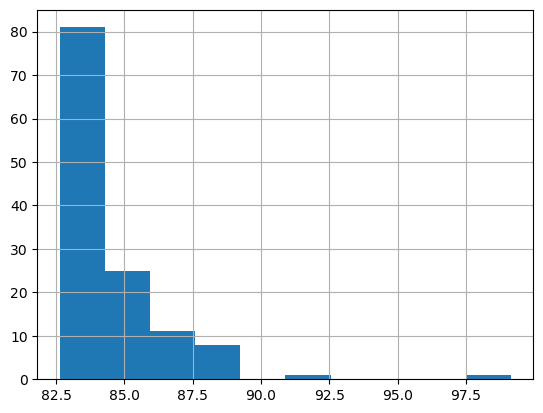

In [26]:
feasible.energy.hist()

In [27]:
feasible.energy.min()

82.64099999999999

## Inspect model

In [28]:
lp_dump = dimod.lp.dumps(model)

In [29]:
print(lp_dump)

Minimize
 obj: + 2.535 pump1_time1 + 6.253 pump2_time1 + 5.577 pump3_time1 
 + 5.577 pump4_time1 + 3.7180000000000004 pump5_time1 + 5.577 pump6_time1 
 + 3.7180000000000004 pump7_time1 + 2.535 pump1_time2 + 6.253 pump2_time2 
 + 5.577 pump3_time2 + 5.577 pump4_time2 + 3.7180000000000004 pump5_time2 
 + 5.577 pump6_time2 + 3.7180000000000004 pump7_time2 + 2.535 pump1_time3 
 + 6.253 pump2_time3 + 5.577 pump3_time3 + 5.577 pump4_time3 
 + 3.7180000000000004 pump5_time3 + 5.577 pump6_time3 
 + 3.7180000000000004 pump7_time3 + 2.535 pump1_time4 + 6.253 pump2_time4 
 + 5.577 pump3_time4 + 5.577 pump4_time4 + 3.7180000000000004 pump5_time4 
 + 5.577 pump6_time4 + 3.7180000000000004 pump7_time4 + 2.535 pump1_time5 
 + 6.253 pump2_time5 + 5.577 pump3_time5 + 5.577 pump4_time5 
 + 3.7180000000000004 pump5_time5 + 5.577 pump6_time5 
 + 3.7180000000000004 pump7_time5 + 2.535 pump1_time6 + 6.253 pump2_time6 
 + 5.577 pump3_time6 + 5.577 pump4_time6 + 3.7180000000000004 pump5_time6 
 + 5.577 pump6_

In [30]:
with open("reservoir.lp", "w") as f:
    print(lp_dump, file=f)

## Formulation from paper

Do not start by trying to write this:

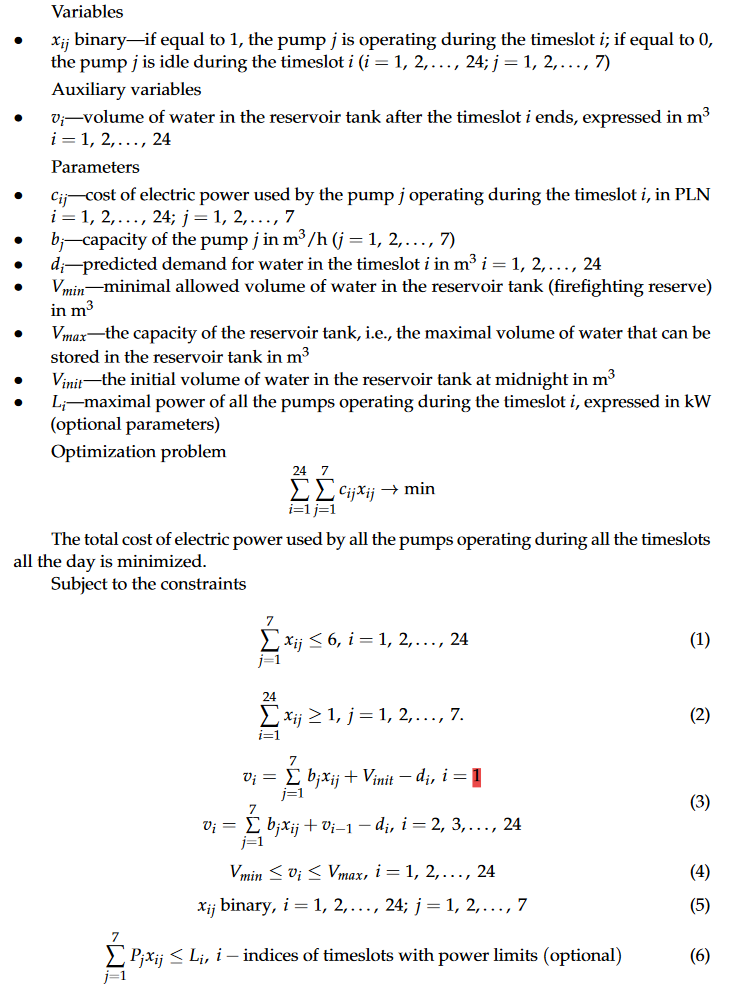

- Note the that the highlighted 1 in cconstraint (3) should be a 0 since the $v_i$ represent volumes at the end of the hour.

- The volume at the end of hour 1 would already be mdoified by the inflow and demand during the first hour.